In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# plt.rcParams['font.family'] ='sans-serif'#使用するフォント
# plt.rcParams["font.sans-serif"] = "Source Han Sans"
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['mathtext.fontset'] = 'cm' 
# plt.rcParams["mathtext.fontset"] = "stix" 
# del matplotlib.font_manager.weight_dict['roman']
plt.rcParams['font.family'] ='Source Han Sans JP' #使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 12 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

plt.rcParams['axes.grid']=True
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.5

matplotlib.font_manager._rebuild()

In [3]:
# https://qiita.com/Fortinbras/items/50500423888ef21429be
class FixedOrderFormatter(ScalarFormatter):
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=True):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self._order_of_mag

In [20]:
option = "8x8"
df_18 = pd.read_excel("xlsx/DCT_"+ option +".xlsx",sheet_name=None)
df_28 = pd.read_excel("xlsx/TPHLCT3_"+ option +".xlsx",sheet_name=None)
df_38 = pd.read_excel("xlsx/DMLCT_n5_"+ option +".xlsx",sheet_name=None)
df_48 = pd.read_excel("xlsx/MSDS_" + option + ".xlsx",sheet_name=None)

In [21]:
option = "16x16"
df_116 = pd.read_excel("xlsx/DCT_"+ option +".xlsx",sheet_name=None)
df_216 = pd.read_excel("xlsx/TPHLCT3_"+ option +".xlsx",sheet_name=None)
df_316 = pd.read_excel("xlsx/DMLCT_n5_"+ option +".xlsx",sheet_name=None)
df_416 = pd.read_excel("xlsx/MSDS_" + option + ".xlsx",sheet_name=None)

In [22]:
option = "32x32"
df_132 = pd.read_excel("xlsx/DCT_"+ option +".xlsx",sheet_name=None)
df_232 = pd.read_excel("xlsx/TPHLCT3_"+ option +".xlsx",sheet_name=None)
df_332 = pd.read_excel("xlsx/DMLCT_n5_"+ option +".xlsx",sheet_name=None)
df_432 = pd.read_excel("xlsx/MSDS_" + option + ".xlsx",sheet_name=None)

# PSNR

In [24]:
# for key in df_1.keys():
    key = "Trumpet"
    print(key)
    sheet18 = df_18[key]
    sheet28 = df_28[key]
    sheet38 = df_38[key]

    sheet116 = df_116[key]
    sheet216 = df_216[key]
    sheet316 = df_316[key]
    
    sheet132 = df_132[key]
    sheet232 = df_232[key]
    sheet332 = df_332[key]
    
    bpp = sheet18["bpp"]
    
    p18 = sheet18["PSNR"]
    p28 = sheet28["PSNR"]
    p38 = sheet38["PSNR"]
    
    p116 = sheet116["PSNR"]
    p216 = sheet216["PSNR"]
    p316 = sheet316["PSNR"]
    
    p132 = sheet132["PSNR"]
    p232 = sheet232["PSNR"]
    p332 = sheet332["PSNR"]
    
    plt.figure(figsize=(5.5,5))
    # DCTとの差を表示する
    plt.scatter(bpp,p28-p18,label="8x8 TPHCLT3",marker=",")
    plt.plot(bpp,p28-p18)
    plt.scatter(bpp,p38-p18,label="8x8 DMLCT",marker="^")
    plt.plot(bpp,p38-p18)

    plt.scatter(bpp,p216-p116,label="16x16 TPHCLT3",marker="+")
    plt.plot(bpp,p216-p116)
    plt.scatter(bpp,p316-p116,label="16x16 DMLCT",marker="x")
    plt.plot(bpp,p316-p116)
    
    plt.scatter(bpp,p232-p132,label="32x32 TPHCLT3",marker="1")
    plt.plot(bpp,p232-p132)
    plt.scatter(bpp,p332-p132,label="32x32 DMLCT",marker="*")
    plt.plot(bpp,p332-p132)
    
    plt.xlabel("Bit Rate[bits/pixel]")
    plt.ylabel("PSNR Gain[dB]")
    plt.legend()

    plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
#     plt.show()
    plt.savefig("output/psnr_diff" + key + ".png",dpi=300)

Trumpet


# MSSIM

Airplane


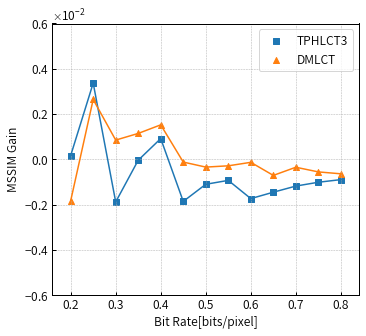

Barbara


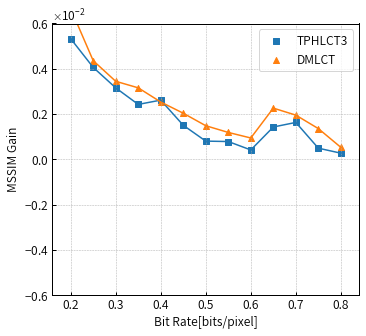

Boat


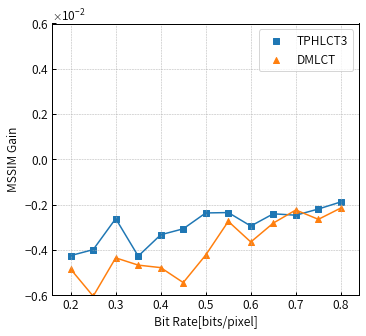

Goldhill


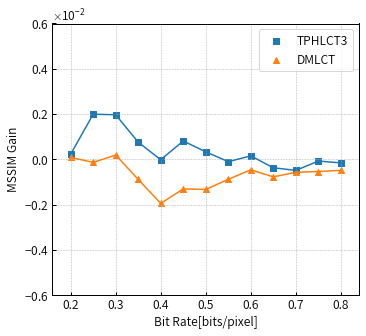

Lenna


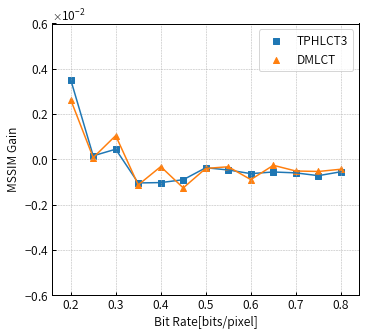

Mandrill


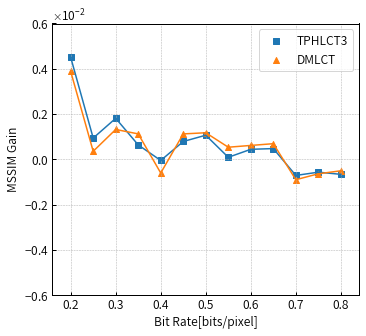

Milkdrop


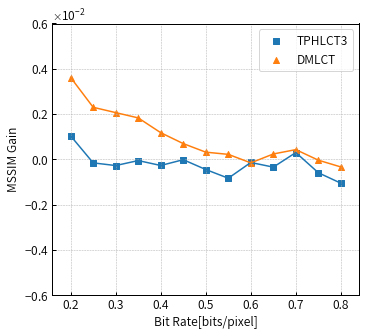

Sailboat


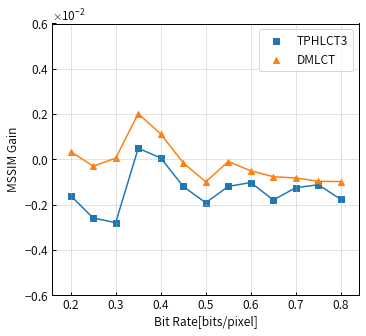

TEST02


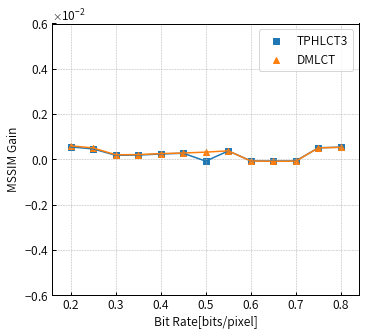

TEST19


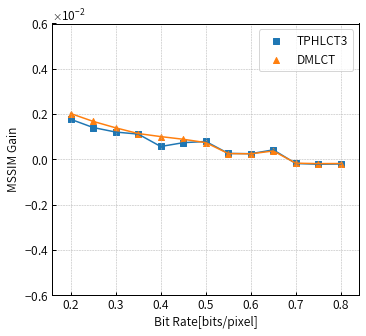

In [49]:
for key in df_1.keys():
#     key = "Airplane"
    print(key)
    sheet1 = df_1[key]
    sheet2 = df_2[key]
    sheet3 = df_3[key]
    
    bpp = sheet1["bpp"]
    
    p1 = sheet1["MSSIM"]
    p2 = sheet2["MSSIM"]
    p3 = sheet3["MSSIM"]
    
    # 軸の目盛り
#     plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=False, left=True, right=False)
    fig = plt.figure(figsize=(5.5,5))
    ax = fig.add_subplot(1,1,1) # Axesを作成
    
    # MSSIM値をそのまま表示
#     plt.scatter(bpp,p1,label="DCT",marker="o")
#     plt.plot(bpp,p1)
#     plt.scatter(bpp,p2,label="TPHLCT3",marker=",")
#     plt.plot(bpp,p2)
#     plt.scatter(bpp,p3,label="DMLCT",marker="^")
#     plt.plot(bpp,p3)

    # DCTとの差を表示する
    ax.scatter(bpp,p2-p1,label="TPHLCT3",marker=",")
    ax.plot(bpp,p2-p1)
    ax.scatter(bpp,p3-p1,label="DMLCT",marker="^")
    ax.plot(bpp,p3-p1)
    ax.set_ylim(-0.006,0.006)

    
    ax.yaxis.set_major_formatter(FixedOrderFormatter(-2 ,useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

    ax.set_xlabel("Bit Rate[bits/pixel]")
    ax.set_ylabel("MSSIM Gain")
    ax.legend()

#     plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。
#     plt.savefig("output/mssim" + key + "_" + option + ".png",dpi=300)
    plt.savefig("output/mssim_diff" + key + "_" + option + ".png",dpi=300)
    plt.show()

# MSDS

Airplane


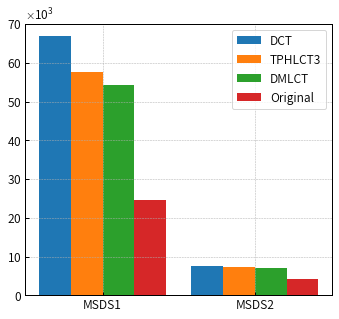

Barbara


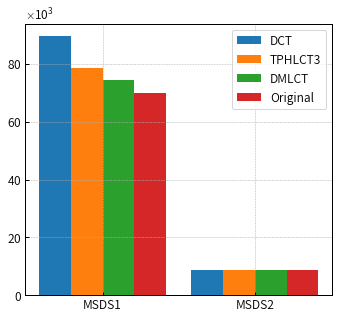

Boat


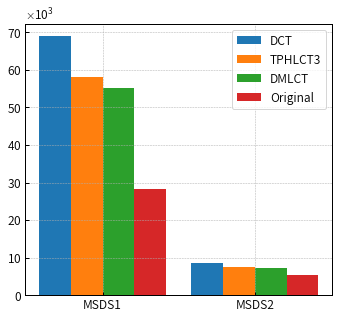

Goldhill


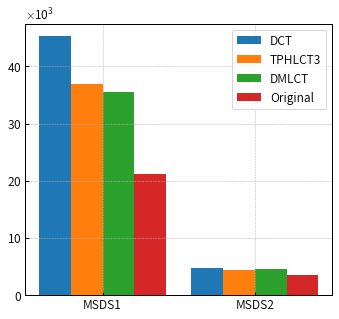

Lenna


SystemError: <built-in method write of _io.BufferedWriter object at 0x7f8c6ba63e08> returned a result with an error set

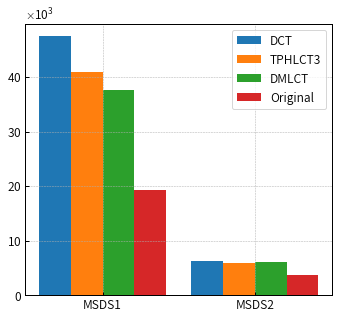

In [50]:
# https://mkacky.wordpress.com/2014/06/24/matplotlib%E3%81%A7%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95%EF%BC%88%E6%A8%AA%E3%81%AB%E4%B8%A6%E3%81%B9%E3%82%8B%EF%BC%89/
for key in df_1.keys():
#     key = "Airplane"
    
    bpp_index = 0
    
    print(key)
    orisheet = df_4[key]
    sheet1 = df_1[key]
    sheet2 = df_2[key]
    sheet3 = df_3[key]
    
    p1 = np.array([sheet1["MSDS1"][bpp_index], sheet1["MSDS2"][bpp_index]])
    p2 = np.array([sheet2["MSDS1"][bpp_index], sheet2["MSDS2"][bpp_index]])
    p3 = np.array([sheet3["MSDS1"][bpp_index], sheet3["MSDS2"][bpp_index]])
    orip = np.array([orisheet["MSDS1"][0], orisheet["MSDS2"][0]])
    
    data = np.array([p1,p2,p3,orip])
    
    # 軸の目盛り
#     plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=False, left=True, right=False)
    fig = plt.figure(figsize=(5.5,5))
    ax = fig.add_subplot(1,1,1) # Axesを作成
    
    # 種類
    num_sample = 4
    # MSDS1, MSDS2の2つ
    num_item_per_sample = 2
    ## 凡例用のラベル（サンプル数だけ必要）
    legend_labels = ["DCT", "TPHLCT3", "DMLCT","Original"]
    ## 棒グラフの幅
    width = 0.25
    ## 余白
    margin = 0.2
    ## 1尺度あたりのデータを並べるのに必要な幅。
    block = width * num_sample + margin
    ## 棒グラフ（長方形）の左下の位置の基準にするポイント
    ind = np.arange(num_item_per_sample) * block
    
    ## 各サンプルについて、棒グラフを描画する
    for i in range(num_sample):
        ax.bar(
            ind + width*i, 		## 棒グラフの左下の点の座標。データ毎に少しずつズラす
            data[i], 			## 各始点にプロットされる1次元配列
            width, 				## 棒の幅
            label=legend_labels[i]	 	## 棒の凡例名
            )
        
    ## x軸に表示するラベルを設定する
    xlabels = np.array(["MSDS1", "MSDS2"])
    ##x軸にラベルを表示する位置を設定する。
    xlocs = ind + width * num_sample / 2 - width/2
    ## xtics(labelの位置, label), labelは1次元配列
    ax.set_xticks(xlocs)
    ax.set_xticklabels(xlabels)
    ## 余白を加味したx軸方向の変域
#     ax.set_xlim(-margin, ind[-1]+width*num_sample+margin)
    
    ax.yaxis.set_major_formatter(FixedOrderFormatter(3 ,useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    ax.legend()

    plt.savefig("output/msds" + key + "_" + option + ".png",dpi=300)
    plt.show()

Airplane


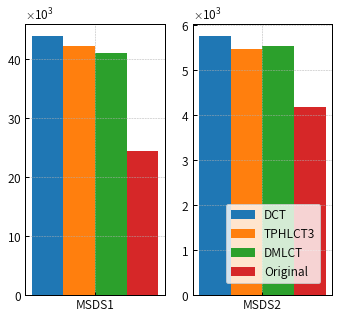

Barbara


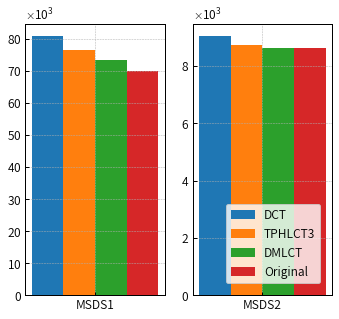

Boat


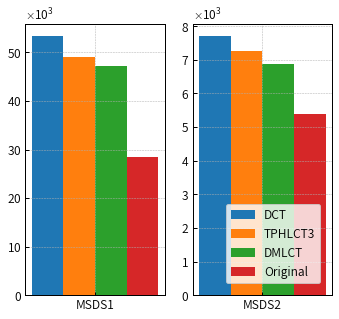

Goldhill


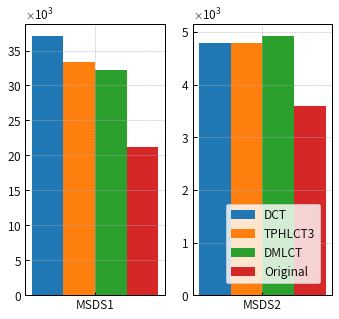

Lenna


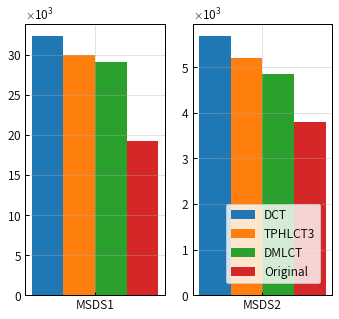

Mandrill


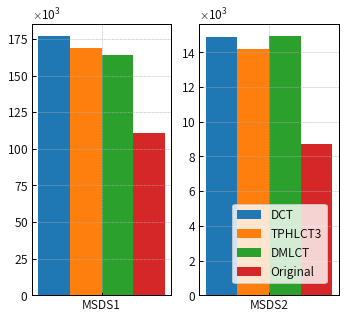

Milkdrop


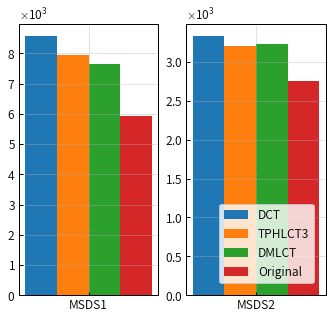

Sailboat


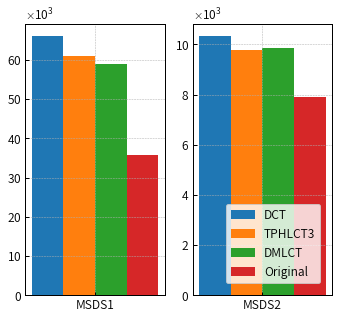

TEST02


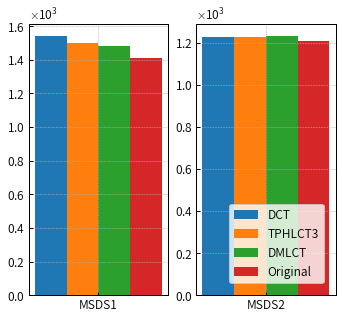

TEST19


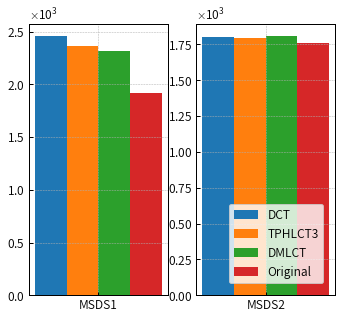

In [51]:
# https://mkacky.wordpress.com/2014/06/24/matplotlib%E3%81%A7%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95%EF%BC%88%E6%A8%AA%E3%81%AB%E4%B8%A6%E3%81%B9%E3%82%8B%EF%BC%89/
for key in df_1.keys():
#     key = "Airplane"
    
    bpp_index = 3
    
    print(key)
    orisheet = df_4[key]
    sheet1 = df_1[key]
    sheet2 = df_2[key]
    sheet3 = df_3[key]
    
    p1 = np.array([sheet1["MSDS1"][bpp_index], sheet1["MSDS2"][bpp_index]])
    p2 = np.array([sheet2["MSDS1"][bpp_index], sheet2["MSDS2"][bpp_index]])
    p3 = np.array([sheet3["MSDS1"][bpp_index], sheet3["MSDS2"][bpp_index]])
    orip = np.array([orisheet["MSDS1"][0], orisheet["MSDS2"][0]])
    
    data = np.array([p1,p2,p3,orip])
    
    # 軸の目盛り
#     plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=False, left=True, right=False)
    fig = plt.figure(figsize=(5.5,5))
    ax = fig.add_subplot(1,2,1) # Axesを作成
    
    # 種類
    num_sample = 4
    # MSDS1, MSDS2の2つ
    num_item_per_sample = 1
    ## 凡例用のラベル（サンプル数だけ必要）
    legend_labels = ["DCT", "TPHLCT3", "DMLCT","Original"]
    ## 棒グラフの幅
    width = 0.25
    ## 余白
    margin = 0.2
    ## 1尺度あたりのデータを並べるのに必要な幅。
    block = width * num_sample + margin
    ## 棒グラフ（長方形）の左下の位置の基準にするポイント
    ind = np.arange(num_item_per_sample) * block
    
    ## 各サンプルについて、棒グラフを描画する
    for i in range(num_sample):
        ax.bar(
            ind + width*i, 		## 棒グラフの左下の点の座標。データ毎に少しずつズラす
            data[i], 			## 各始点にプロットされる1次元配列
            width, 				## 棒の幅
            label=legend_labels[i]	 	## 棒の凡例名
            )
        
    ## x軸に表示するラベルを設定する
    xlabels = np.array(["MSDS1", "MSDS2"])
    ##x軸にラベルを表示する位置を設定する。
    xlocs = ind + width * num_sample / 2 - width/2
    ## xtics(labelの位置, label), labelは1次元配列
    ax.set_xticks(xlocs)
    ax.set_xticklabels(xlabels)
    ## 余白を加味したx軸方向の変域
#     ax.set_xlim(-margin, ind[-1]+width*num_sample+margin)
    
    ax.yaxis.set_major_formatter(FixedOrderFormatter(3 ,useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
#     ax.legend()
    
    ###############################################################################################################
    p1 = np.array([sheet1["MSDS2"][bpp_index]])
    p2 = np.array([sheet2["MSDS2"][bpp_index]])
    p3 = np.array([sheet3["MSDS2"][bpp_index]])
    orip = np.array([orisheet["MSDS2"][0]])
    
    data = np.array([p1,p2,p3,orip])
    
    # 軸の目盛り
#     plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=False, left=True, right=False)
#     fig = plt.figure(figsize=(5.5,5))
    ax = fig.add_subplot(1,2,2) # Axesを作成
    
    # 種類
    num_sample = 4
    # MSDS1, MSDS2の2つ
    num_item_per_sample = 1
    ## 凡例用のラベル（サンプル数だけ必要）
    legend_labels = ["DCT", "TPHLCT3", "DMLCT","Original"]
    ## 棒グラフの幅
    width = 0.25
    ## 余白
    margin = 0.2
    ## 1尺度あたりのデータを並べるのに必要な幅。
    block = width * num_sample + margin
    ## 棒グラフ（長方形）の左下の位置の基準にするポイント
    ind = np.arange(num_item_per_sample) * block
    
    ## 各サンプルについて、棒グラフを描画する
    for i in range(num_sample):
        ax.bar(
            ind + width*i, 		## 棒グラフの左下の点の座標。データ毎に少しずつズラす
            data[i], 			## 各始点にプロットされる1次元配列
            width, 				## 棒の幅
            label=legend_labels[i]	 	## 棒の凡例名
            )
        
    ## x軸に表示するラベルを設定する
    xlabels = np.array(["MSDS2"])
    ##x軸にラベルを表示する位置を設定する。
    xlocs = ind + width * num_sample / 2 - width/2
    ## xtics(labelの位置, label), labelは1次元配列
    ax.set_xticks(xlocs)
    ax.set_xticklabels(xlabels)
    ## 余白を加味したx軸方向の変域
#     ax.set_xlim(-margin, ind[-1]+width*num_sample+margin)
    
    ax.yaxis.set_major_formatter(FixedOrderFormatter(3 ,useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    
    ax.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1)
#     ax.legend(bbox_to_anchor=(1, 0.5), loc='center right', borderaxespad=1)

    plt.savefig("output/msds" + key + "_" + option + ".png",dpi=300)
    plt.show()